<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Pytorch/blob/main/Notebooks/Pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model

In [ ]:
# Imports
import torch
import matplotlib.pyplot as plt # For visualizing predictions
torch.__version__

'1.12.1+cu113'

## prerquarities

In [ ]:
# Creating known parameters
weight = 0.7
bias = 0.3

# Creating Main data
start = 0.0
end = 1.0
step = 0.02

X = torch.arange(start,end,step)
X[:5] , X.shape

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800]), torch.Size([50]))

In [ ]:
# some modifying on the data
X = X.unsqueeze(1)
X[:5] , X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]), torch.Size([50, 1]))

In [ ]:
# Creating output features
y = X * weight + bias
y[:5] , y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]), torch.Size([50, 1]))

## 1. Splitting data into training and test sets

In [ ]:
train_split = int(0.8 * len(X)) # be carefull about train_split type because in slicing numbers must be integeres

X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

len (X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

Actully for visualization we need a visualizing function for Ploting training data, test data and compares predictions

In [ ]:
def plot_prediction(train_data=X_train,
                    train_lables=y_train,
                    test_data=X_test,
                    test_lables=y_test,
                    prediction=None) :

      plt.figure(figsize=(10,7))
      plt.scatter(train_data , train_lables ,c="b",s=4,label="training data")
      plt.scatter(test_data , test_lables, c="g",s=4, label = "testing data")

      if prediction is not None :
        plt.scatter(test_data , prediction , c="r" , s=4, label = "pedictions")

      plt.legend(prop={"size" : 14})


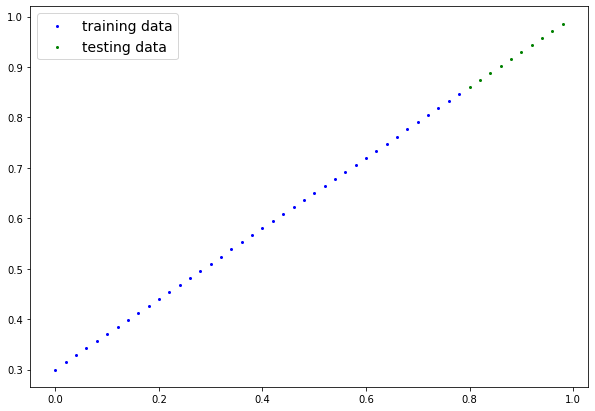

In [ ]:
plot_prediction()

## 2. Build a model

main model functions :

1.   starting with the random values
2.   looking in error of data
3.   using mathematical optimization to make better predictions


In [ ]:
from torch import nn

In [ ]:
class LinearRegression_0(nn.Module) :
  # nn.Module is base class for neural networks
  def __init__(self) :
     super().__init__()
     self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
     self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self , x : torch.tensor) -> torch.tensor :
     return (x * self.weight + self.bias)


In [ ]:
# some pytoch basic defenitions for models

### Checking contents of model

In [ ]:
# assigning manual seed
torch.manual_seed(42)
# Creating a instance of model
model_0 = LinearRegression_0()
# checking model parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# or mabye we could use
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

### making predictions with untrained model

In [ ]:
with torch.inference_mode() : # used for creating predicting state in pytorch
  y_preds = model_0(X_test)

In [ ]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

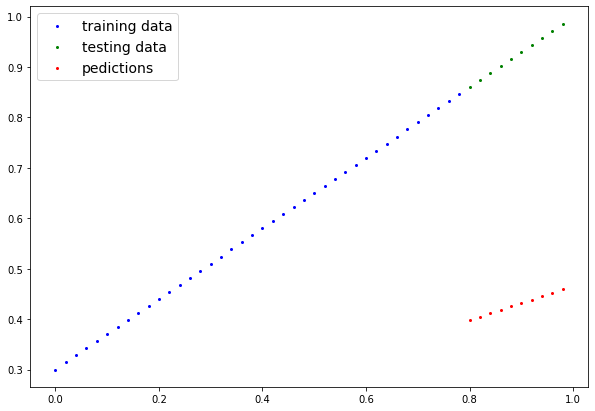

In [ ]:
plot_prediction(prediction=y_preds)

## 3. Training loop

In [ ]:
# Intriduction to model basics

### optimizer and loss function

In [ ]:
# creating a loss function for calculating error of model prediction (in this case MAE = mean absolute error)
loss_fn = nn.L1Loss()
# Creating an optimizer forTakes into account the loss of a model and adjusts the model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters() # introducing model parameters to the optimizer
                      , lr = 0.01 ) # lr = learing rate  = the rate of optimizing data

In [ ]:
torch.manual_seed(42)
epochs = 200

#=====================
# Training loop
#=====================

for epoch in range(epochs) :
  # 1. adjusting model in training mode
  model_0.train()
  # 2. making predictions
  y_pred = model_0(X_train)
  # 3. calculating error of model predictions
  loss = loss_fn(y_pred,y_train)
  # 4. adjusting optimizer gradients to zero
  optimizer.zero_grad()
  # 5. coming back to the start of the neural network (back propagation)
  loss.backward()
  # 6. optimizer steping back
  optimizer.step()
  #======================
  # teting loop
  #======================
  model_0.eval()
  # 1. using pytorch inference mode for making predictions
  with torch.inference_mode() :
    test_pred = model_0(X_test)
  # 2. calculating the loss
  test_loss = loss_fn(test_pred,y_test)
  if epoch % 10 == 0 :
    print(f"{epoch}   :  {test_loss}  ")

0   :  0.48106518387794495  
10   :  0.3463551998138428  
20   :  0.21729660034179688  
30   :  0.14464017748832703  
40   :  0.11360953003168106  
50   :  0.09919948130846024  
60   :  0.08886633068323135  
70   :  0.0805937647819519  
80   :  0.07232122868299484  
90   :  0.06473556160926819  
100   :  0.05646304413676262  
110   :  0.04819049686193466  
120   :  0.04060482233762741  
130   :  0.03233227878808975  
140   :  0.024059748277068138  
150   :  0.016474086791276932  
160   :  0.008201557211577892  
170   :  0.005023092031478882  
180   :  0.005023092031478882  
190   :  0.005023092031478882  


In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
y_prediction = model_0(X_test)

In [ ]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


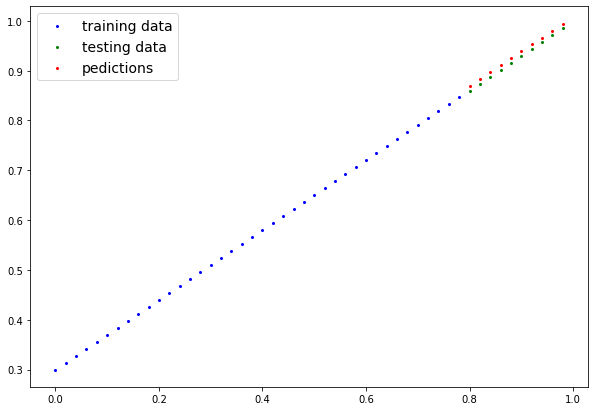

In [ ]:
plot_prediction(prediction=np.array(torch.tensor(y_prediction).numpy()))